In [21]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

#Share info
S0 = 100
sigma = 0.3
T = 1
r=0.06

#Algorithm info
N = 2**10
delta = 0.25
alpha = 1.5
phi = norm.cdf

In [22]:
def log_char(u):
    return np.exp(1j*u*(np.log(S0)+(r-sigma**2/2)*T)-sigma**2*T*u**2/2)

def c_func(v):
    val1 = np.exp(-r*T)*log_char(v-(alpha+1)*1j)
    val2 = alpha**2+alpha-v**2+1j*(2*alpha+1)*v
    return val1/val2

In [23]:
n = np.array(range(N))
delta_k = 2*np.pi/(N*delta)
b = delta_k*(N-1)/2

log_strike = np.linspace(-b,b,N)

x = np.exp(1j*b*n*delta)*c_func(n*delta)*(delta)
x[0] = x[0]*0.5
x[-1] = x[-1]*0.5

In [24]:
#I used the in-built fft function to minimise typing here and
#    respond to the question quickly, otherwise, of course,
#    the full example in the notes first defines the complete function then uses it.
xhat = np.fft.fft(x).real 

fft_call = np.exp(-alpha*log_strike)*xhat/np.pi

#call price
d1 = (np.log(S0/np.exp(log_strike))+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T)
analytic_callprice = S0*phi(d1) - np.exp(log_strike)*np.exp(-r*(T))*phi(d2)


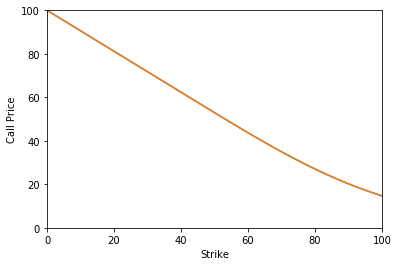

In [25]:
plt.plot(np.exp(log_strike), analytic_callprice) #LINE 1
plt.plot(np.exp(log_strike), fft_call) #LINE 2
plt.axis([0,100,0,100]) #LINE 3
plt.xlabel("Strike")
plt.ylabel("Call Price")
plt.show() 

In [26]:
#Multiple things to be noted here about the plotting below. I have labelled the
#    lines as LINE 1 - 6 for easy reference in this explanation.

#NUMBER 1. The form we have been used to of the plot function plots a data set of our own
#    on the y-axis against an automatic number line on the x-axis, as used in the two cases 
#    on page 46 of the notes, for example, in the from plt.plot(y). However, to plot two
#    data sets of our own, with one on the x-axis and one on the y-axis, we use the form:
#    plt.plot(x,y). The set to go on the x-axis goes first, then the set to go on the
#    y-axis goes second.


#NUMBER 2. The variable log_strike holds the values of ln(strike).
#    Therefore, to plot against the strike itself, we have to do the inverse of
#    ln(strike), which is e^strike. This is written here in the code as np.exp(log_strike).


#LINE 1 uses the concepts of NUMBER 1 and NUMBER 2 above, to plot e^strike against
#    the analytical call prices. LINE 2 does the same thing, plotting e^strike against
#    the FFT call price estimates.


#NUMBER 3. Temporarily disable LINE 3 below, by putting # in front of it, then run this code.
#    If you followed NUMBER 1 and NUMBER 2 above, you would get the correct graph.
#    But as you can see, it would not look at all like the graph in the notes. You would notice
#    on the x-axis that the values go beyond 250000. Referring back to page 46 of the M4 notes,
#    the automatic number line on the x-axis takes values up to 50 because there are 50 values
#    in the array COS_callprice. Here in this FFT code, there are 1024 values in log_strike, which
#    means there are also 1024 values of e^strike, the largest being about 282000.
#    So the automatic x-axis goes up to that value. To limit the x-axis to 100, as has been
#    done for the FFT example in the notes, we use LINE 3. You can enable it again now by
#    removing the # and running the code again. The axis function
#    takes, in order, (x-axisMinimum, x-axisMaximum, y-axisMinimum, y-axisMaximum).
#    So LINE 3 has a minimum of 0 and maximum of 100 on the x-axis, so only part of the
#    original graph is shown, and it is the part we need. Now it looks more like the 
#    example in the notes! 
    

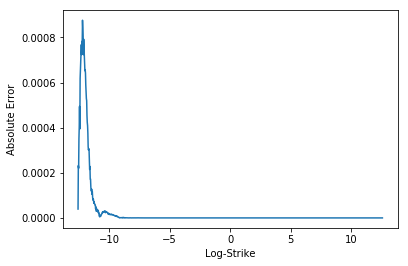

In [27]:
plt.plot(log_strike, np.absolute(fft_call-analytic_callprice)) #LINE 5
plt.xlabel("Log-Strike")
plt.ylabel("Absolute Error")
plt.show()